# Mutivariate Thinking

Explore multivariate relationships using multiple regression to describe 
__non-linear relationships and logistic regression__ to explain and predict 
binary variables.

## Limits of simple regression

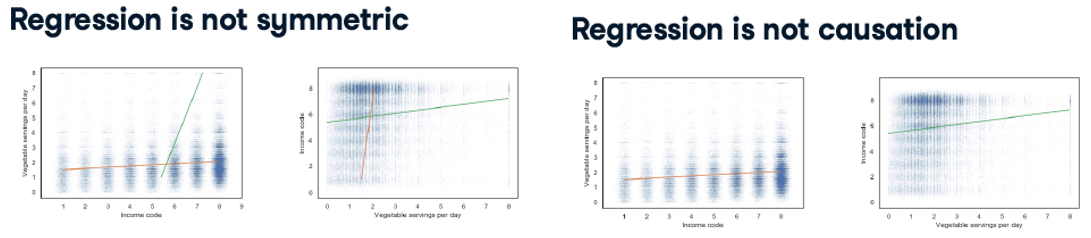

## Multiple regression

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

brfss = pd.read_hdf('./Data/brfss.hdf5')

In [24]:
results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()
results.params

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

### Income and education

In [25]:
gss = pd.read_hdf('./Data/gss.hdf5', 'gss')
results = smf.ols('realinc ~ educ', data=gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

### Adding age

In [26]:
results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

### Income and age

In [27]:
grouped = gss.groupby('age')

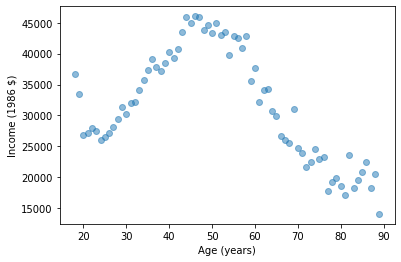

In [28]:
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age, 'o', alpha=0.5);
plt.xlabel('Age (years)');
plt.ylabel('Income (1986 $)');

### Adding a quadratic term

In [29]:
gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

## Visualizing regression results

### Modeling income and age

In [30]:
gss['age2'] = gss['age']**2
gss['educ2'] = gss['educ']**2
model = smf.ols('realinc ~ educ + educ2 + age + age2',
data=gss)
results = model.fit()
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

### Generating predictions

In [31]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2
df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)

### Plotting predictions

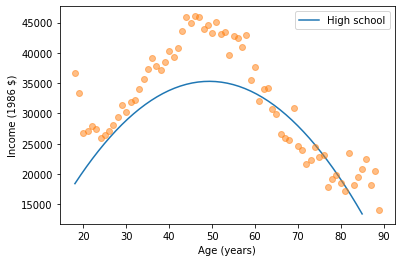

In [35]:
plt.plot(df['age'], pred12, label='High school')
plt.plot(mean_income_by_age, 'o', alpha=0.5);
plt.xlabel('Age (years)');
plt.ylabel('Income (1986 $)');
plt.legend();

### Levels of education

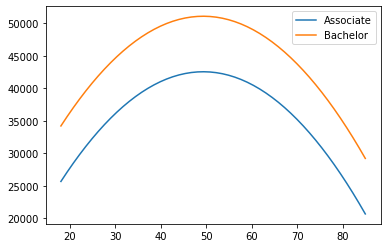

In [40]:
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate');
plt.legend();

df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor');
plt.legend();

## Logistic regression

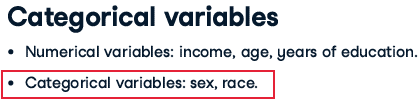

### Sex and income

In [41]:
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

### Boolean variable

In [ ]:
# If a categorical variable has only two values, it's called boolean variable.

In [42]:
gss['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [43]:
gss['gunlaw'].replace([2], [0], inplace=True)
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

### Logistic Regression

In [44]:
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

### Generating predictions

In [45]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2
df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)

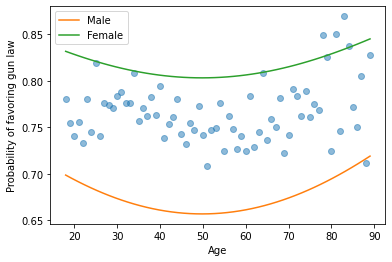

In [48]:
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)
plt.plot(df['age'], pred1, label='Male');
plt.plot(df['age'], pred2, label='Female');
plt.xlabel('Age');
plt.ylabel('Probability of favoring gun law');
plt.legend();

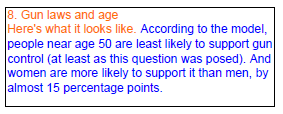